In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

LINEAR REGRESSION

In [2]:
data=pd.read_csv("/kaggle/input/protom-dec2022-csv-data-updated/PROTOM_DEC2022_CSV_DATA_UPDATED.csv")
data

,DATE,BOX_PRICE,NUM_BOX_BUY,SALED,UN_SALED,HIGH_TEMP,LOW_TEMP,HIMUDITY,WIND
0,10/4/2022,480,72,72,0,31,28,82,5
1,10/5/2022,480,60,55,5,31,28,86,4
2,10/6/2022,530,57,57,0,27,27,92,17
3,10/7/2022,550,78,75,3,27,27,93,0
4,10/8/2022,530,75,75,0,29,29,83,6
...,...,...,...,...,...,...,...,...,...
59,12/2/2022,190,90,90,0,32,27,76,8
60,12/3/2022,200,85,85,0,31,27,80,10
61,12/4/2022,240,77,77,0,31,26,80,6
62,12/5/2022,200,90,90,0,30,26,80,5


In [3]:
data.columns



Index(['DATE', 'BOX_PRICE', 'NUM_BOX_BUY', 'SALED', 'UN_SALED', 'HIGH_TEMP',
       'LOW_TEMP', 'HIMUDITY', 'WIND'],
      dtype='object')

In [4]:
# data=data[['BOX_PRICE','SALED']]
data

,DATE,BOX_PRICE,NUM_BOX_BUY,SALED,UN_SALED,HIGH_TEMP,LOW_TEMP,HIMUDITY,WIND
0,10/4/2022,480,72,72,0,31,28,82,5
1,10/5/2022,480,60,55,5,31,28,86,4
2,10/6/2022,530,57,57,0,27,27,92,17
3,10/7/2022,550,78,75,3,27,27,93,0
4,10/8/2022,530,75,75,0,29,29,83,6
...,...,...,...,...,...,...,...,...,...
59,12/2/2022,190,90,90,0,32,27,76,8
60,12/3/2022,200,85,85,0,31,27,80,10
61,12/4/2022,240,77,77,0,31,26,80,6
62,12/5/2022,200,90,90,0,30,26,80,5


In [5]:
data.corr()

/tmp/ipykernel_20/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,BOX_PRICE,NUM_BOX_BUY,SALED,UN_SALED,HIGH_TEMP,LOW_TEMP,HIMUDITY,WIND
BOX_PRICE,1.000000,-0.580322,-0.540879,-0.068813,0.086105,0.563410,0.434228,-0.100967
NUM_BOX_BUY,-0.580322,1.000000,0.973051,-0.058991,-0.112047,-0.302335,-0.219684,0.158492
SALED,-0.540879,0.973051,1.000000,-0.287592,-0.100613,-0.310046,-0.233587,0.184100
UN_SALED,-0.068813,-0.058991,-0.287592,1.000000,-0.029815,0.086486,0.098777,-0.138704
HIGH_TEMP,0.086105,-0.112047,-0.100613,-0.029815,1.000000,0.607864,-0.517553,-0.016498
LOW_TEMP,0.563410,-0.302335,-0.310046,0.086486,0.607864,1.000000,-0.020784,-0.022478
HIMUDITY,0.434228,-0.219684,-0.233587,0.098777,-0.517553,-0.020784,1.000000,-0.208498
WIND,-0.100967,0.158492,0.184100,-0.138704,-0.016498,-0.022478,-0.208498,1.000000


/tmp/ipykernel_20/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

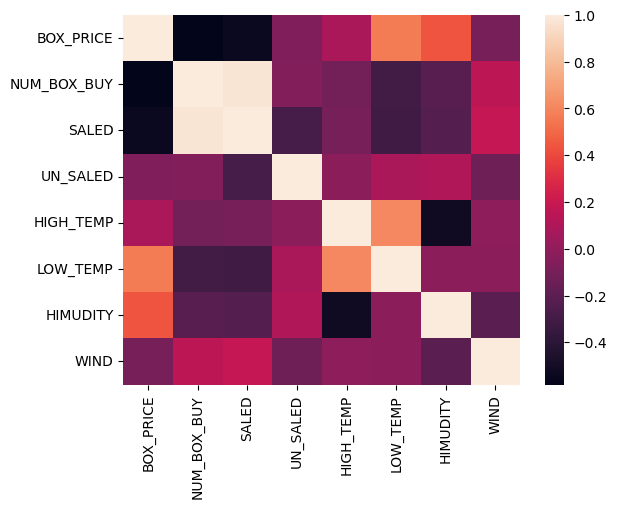

In [6]:
sns.heatmap(data.corr())

In [7]:
data.corr()

/tmp/ipykernel_20/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,BOX_PRICE,NUM_BOX_BUY,SALED,UN_SALED,HIGH_TEMP,LOW_TEMP,HIMUDITY,WIND
BOX_PRICE,1.000000,-0.580322,-0.540879,-0.068813,0.086105,0.563410,0.434228,-0.100967
NUM_BOX_BUY,-0.580322,1.000000,0.973051,-0.058991,-0.112047,-0.302335,-0.219684,0.158492
SALED,-0.540879,0.973051,1.000000,-0.287592,-0.100613,-0.310046,-0.233587,0.184100
UN_SALED,-0.068813,-0.058991,-0.287592,1.000000,-0.029815,0.086486,0.098777,-0.138704
HIGH_TEMP,0.086105,-0.112047,-0.100613,-0.029815,1.000000,0.607864,-0.517553,-0.016498
LOW_TEMP,0.563410,-0.302335,-0.310046,0.086486,0.607864,1.000000,-0.020784,-0.022478
HIMUDITY,0.434228,-0.219684,-0.233587,0.098777,-0.517553,-0.020784,1.000000,-0.208498
WIND,-0.100967,0.158492,0.184100,-0.138704,-0.016498,-0.022478,-0.208498,1.000000


In [8]:
data.shape

(64, 9)

In [9]:
data=data.head(10)
data

,DATE,BOX_PRICE,NUM_BOX_BUY,SALED,UN_SALED,HIGH_TEMP,LOW_TEMP,HIMUDITY,WIND
0,10/4/2022,480,72,72,0,31,28,82,5
1,10/5/2022,480,60,55,5,31,28,86,4
2,10/6/2022,530,57,57,0,27,27,92,17
3,10/7/2022,550,78,75,3,27,27,93,0
4,10/8/2022,530,75,75,0,29,29,83,6
5,10/9/2022,450,77,75,2,27,27,90,9
6,10/10/2022,460,74,74,0,26,26,96,0
7,10/11/2022,460,72,72,0,32,27,88,7
8,10/12/2022,500,72,72,0,31,28,84,5
9,10/13/2022,480,72,69,3,32,29,78,3


In [10]:
data.shape

(10, 9)

In [11]:

# data=data[["BOX_PRICE","SALED"]]
x=pd.DataFrame(data[["BOX_PRICE","LOW_TEMP","HIGH_TEMP","HIMUDITY","WIND","NUM_BOX_BUY"]])
y=pd.DataFrame(data['SALED'])

#price=price.dropna()
#saled=saled.dropna()



In [12]:
lm=linear_model.LinearRegression()
model=lm.fit(x,y)


In [13]:
model.score(x,y)*100


96.3441041005435

In [14]:
# new_price=120
# new_price=model.predict([[new_price,25]])
# new_price

DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
x=pd.DataFrame(data[["BOX_PRICE","LOW_TEMP","HIGH_TEMP","HIMUDITY","WIND","NUM_BOX_BUY"]])
y=pd.DataFrame(data['SALED'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
# fit the regressor with X and Y data
regressor.fit(x_train,y_train)
prd_y=regressor.predict(x_test)

r2_score=accuracy_score(y_test,prd_y)
r2_score*100


50.0

Linear Regression

In [16]:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
prd_y2=model.predict(x_test)

r2_score=mean_squared_error(y_test,prd_y2)
r2_score*100

2186.259492111311

Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators= 1, criterion="squared_error")
model.fit(x_train,y_train)
prd_y=model.predict(x_test)

r2_score=mean_squared_error(y_test,prd_y)
r2_score*100


/tmp/ipykernel_20/131060554.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


14450.0